<a href="https://colab.research.google.com/github/693080593/research/blob/master/%5B2%5D_HHV_cHB_Mcl_KFold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd

# Import supplementary visualizations code visuals.py
import visuals as vs


# Pretty display for notebooks
%matplotlib inline

# Load the dataset
data = pd.read_csv(r'/content/Feed Effect on Biocrude HHV Data ML 111020.csv')
Oil_HHV = data['Bio-crude Oil HHV']
Features = data.drop('Bio-crude Oil HHV', axis = 1)

# Success
print ("Bio-crude HHV dataset has {} data points with {} variables each.".format(*data.shape))
data.shape

data[:240:30]


Bio-crude HHV dataset has 123 data points with 8 variables each.


,Lipid,Protein,Cellulose,Hemicellulose,Carbohydrate,Lignin,Ash,Bio-crude Oil HHV
0,1.7,27.2,14.4,3.5,0.0,5.7,47.5,25.8
30,0.0,0.0,45.5,45.5,0.0,9.1,0.0,39.2
60,0.0,6.5,52.8,0.0,0.0,38.7,1.1,26.2
90,23.6,42.0,0.0,0.0,5.9,0.0,26.4,34.5
120,0.1,71.3,0.5,0.3,22.0,0.2,5.6,38.5


In [6]:
# Check the dataset with the first and last three rows
pd.set_option('display.max_rows',6)
data

,Lipid,Protein,Cellulose,Hemicellulose,Carbohydrate,Lignin,Ash,Bio-crude Oil HHV
0,1.7,27.2,14.4,3.5,0.0,5.7,47.5,25.8
1,6.4,26.5,11.8,9.5,0.0,5.2,39.7,27.5
2,11.0,25.9,9.1,15.4,0.0,4.7,31.9,22.0
...,...,...,...,...,...,...,...,...
120,0.1,71.3,0.5,0.3,22.0,0.2,5.6,38.5
121,11.2,49.2,0.0,0.0,31.2,0.0,6.6,35.3
122,14.0,59.0,0.0,0.0,20.0,0.0,3.0,38.0


In [7]:
# Check the whole information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Lipid              123 non-null    float64
 1   Protein            123 non-null    float64
 2   Cellulose          123 non-null    float64
 3   Hemicellulose      123 non-null    float64
 4   Carbohydrate       123 non-null    float64
 5   Lignin             123 non-null    float64
 6   Ash                123 non-null    float64
 7   Bio-crude Oil HHV  123 non-null    float64
dtypes: float64(8)
memory usage: 7.8 KB


In [8]:
# TODO: Minimum price of the data
minimum_Oil_HHV = np.min(Oil_HHV)

# TODO: Maximum price of the data
maximum_Oil_HHV = np.max(Oil_HHV)

# TODO: Mean price of the data
mean_Oil_HHV = np.mean(Oil_HHV)

# TODO: Median price of the data
median_Oil_HHV = np.median(Oil_HHV)

# TODO: Standard deviation of prices of the data
std_Oil_HHV = np.std(Oil_HHV)

# Show the calculated statistics

print("Statistics for bio-crude HHV dataset:\n")
print("Minimum bio-crude oil HHV:{: .2f} MJ/kg".format(minimum_Oil_HHV))
print("Maximum bio-crude oil HHV:{: .2f} MJ/kg".format(maximum_Oil_HHV))
print("Mean bio-crude oil HHV:{: .2f} MJ/kg".format(mean_Oil_HHV))
print("Median bio-crude oil HHV:{: .2f} MJ/kg".format(median_Oil_HHV))
print("Standard deviation of bio-crude oil HHV:{: .2f} MJ/kg".format(std_Oil_HHV))

data.describe()

Statistics for bio-crude HHV dataset:

Minimum bio-crude oil HHV: 17.70 MJ/kg
Maximum bio-crude oil HHV: 44.40 MJ/kg
Mean bio-crude oil HHV: 33.22 MJ/kg
Median bio-crude oil HHV: 34.00 MJ/kg
Standard deviation of bio-crude oil HHV: 5.09 MJ/kg


,Lipid,Protein,Cellulose,Hemicellulose,Carbohydrate,Lignin,Ash,Bio-crude Oil HHV
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,8.754472,24.526016,20.039837,8.446341,18.629268,8.554472,7.239024,33.221138
std,16.802543,26.330998,27.646648,16.922036,25.908710,14.504868,11.343089,5.108098
...,...,...,...,...,...,...,...,...
50%,1.700000,17.600000,1.000000,0.000000,9.000000,0.000000,3.000000,34.000000
75%,11.050000,44.050000,39.600000,9.200000,25.850000,14.300000,7.500000,36.550000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,47.500000,44.400000


In [9]:
# Skewness coefficient
for i in data.columns:
  print('{} Skewness coefficient: '.format(i),data[i].skew())

Lipid Skewness coefficient:  3.569132791152984
Protein Skewness coefficient:  0.870860205073259
Cellulose Skewness coefficient:  1.3283729140090017
Hemicellulose Skewness coefficient:  2.7781066309358473
Carbohydrate Skewness coefficient:  2.008322377190648
Lignin Skewness coefficient:  2.8565467704463687
Ash Skewness coefficient:  2.1253719916234477
Bio-crude Oil HHV Skewness coefficient:  -0.48929877117154447


In [10]:
# Kurtosis Coefficient
for i in data.columns:
  print("{} Kurtosis Coefficient: ".format(i),data[i].kurt())

Lipid Kurtosis Coefficient:  15.122245775754337
Protein Kurtosis Coefficient:  -0.0044184066594077365
Cellulose Kurtosis Coefficient:  0.870639509732015
Hemicellulose Kurtosis Coefficient:  9.546842303004492
Carbohydrate Kurtosis Coefficient:  3.872985151903222
Lignin Kurtosis Coefficient:  12.669943477969987
Ash Kurtosis Coefficient:  3.818776901627681
Bio-crude Oil HHV Kurtosis Coefficient:  0.15990513963111175


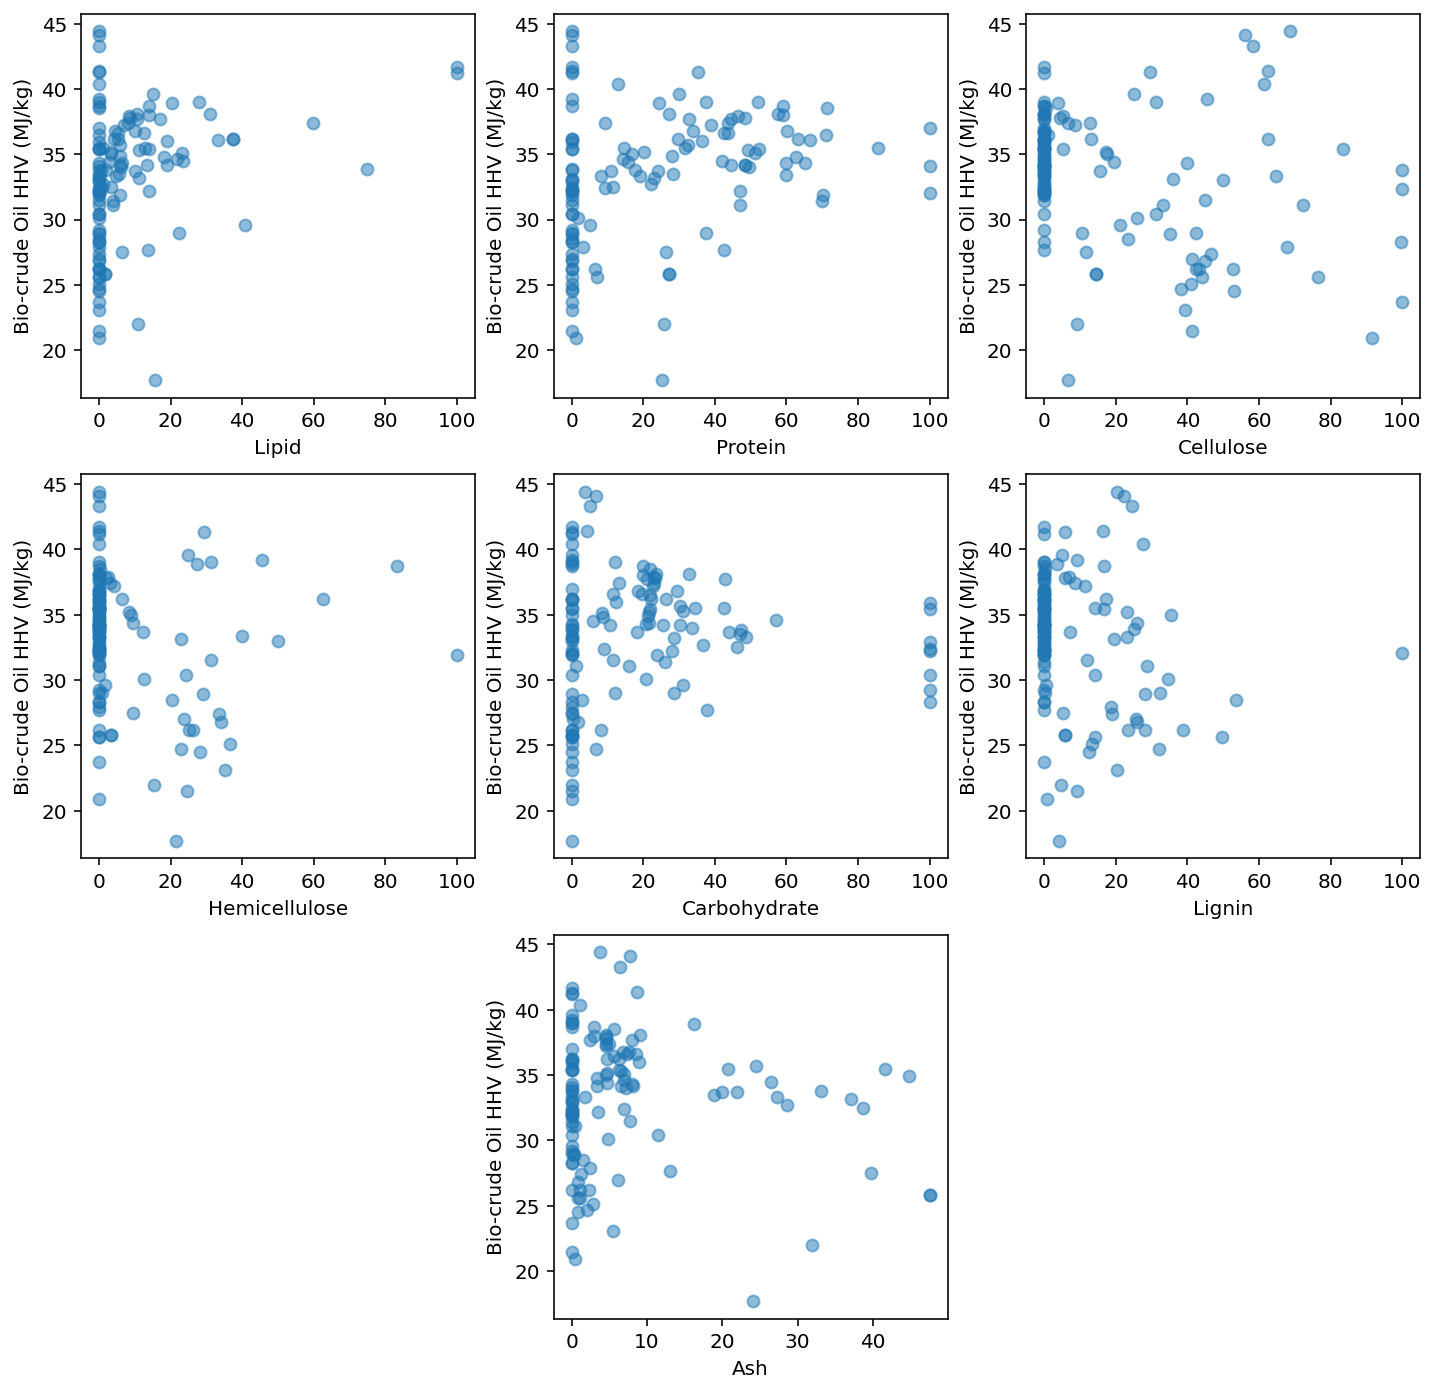

In [11]:
# Load matplotlib
import matplotlib.pyplot as plt

# Show the figure with higher resolution
%config InlineBackend.figure_format = 'retina'

# Adjust the size of figure
plt.figure(figsize=(12,12))

plt.subplot(331)
plt.xlabel('Lipid')
plt.ylabel('Bio-crude Oil HHV (MJ/kg)')
plt.scatter(data['Lipid'],data['Bio-crude Oil HHV'],alpha = 0.5)

plt.subplot(332)
plt.xlabel('Protein')
plt.ylabel('Bio-crude Oil HHV (MJ/kg)')
plt.scatter(data['Protein'],data['Bio-crude Oil HHV'],alpha = 0.5)

plt.subplot(333)
plt.xlabel('Cellulose')
plt.ylabel('Bio-crude Oil HHV (MJ/kg)')
plt.scatter(data['Cellulose'],data['Bio-crude Oil HHV'],alpha = 0.5)

plt.subplot(334)
plt.xlabel('Hemicellulose')
plt.ylabel('Bio-crude Oil HHV (MJ/kg)')
plt.scatter(data['Hemicellulose'],data['Bio-crude Oil HHV'],alpha = 0.5)

plt.subplot(335)
plt.xlabel('Carbohydrate')
plt.ylabel('Bio-crude Oil HHV (MJ/kg)')
plt.scatter(data['Carbohydrate'],data['Bio-crude Oil HHV'],alpha = 0.5)

plt.subplot(336)
plt.xlabel('Lignin')
plt.ylabel('Bio-crude Oil HHV (MJ/kg)')
plt.scatter(data['Lignin'],data['Bio-crude Oil HHV'],alpha = 0.5)

plt.subplot(338)
plt.xlabel('Ash')
plt.ylabel('Bio-crude Oil HHV (MJ/kg)')
plt.scatter(data['Ash'],data['Bio-crude Oil HHV'],alpha = 0.5)
plt.show()

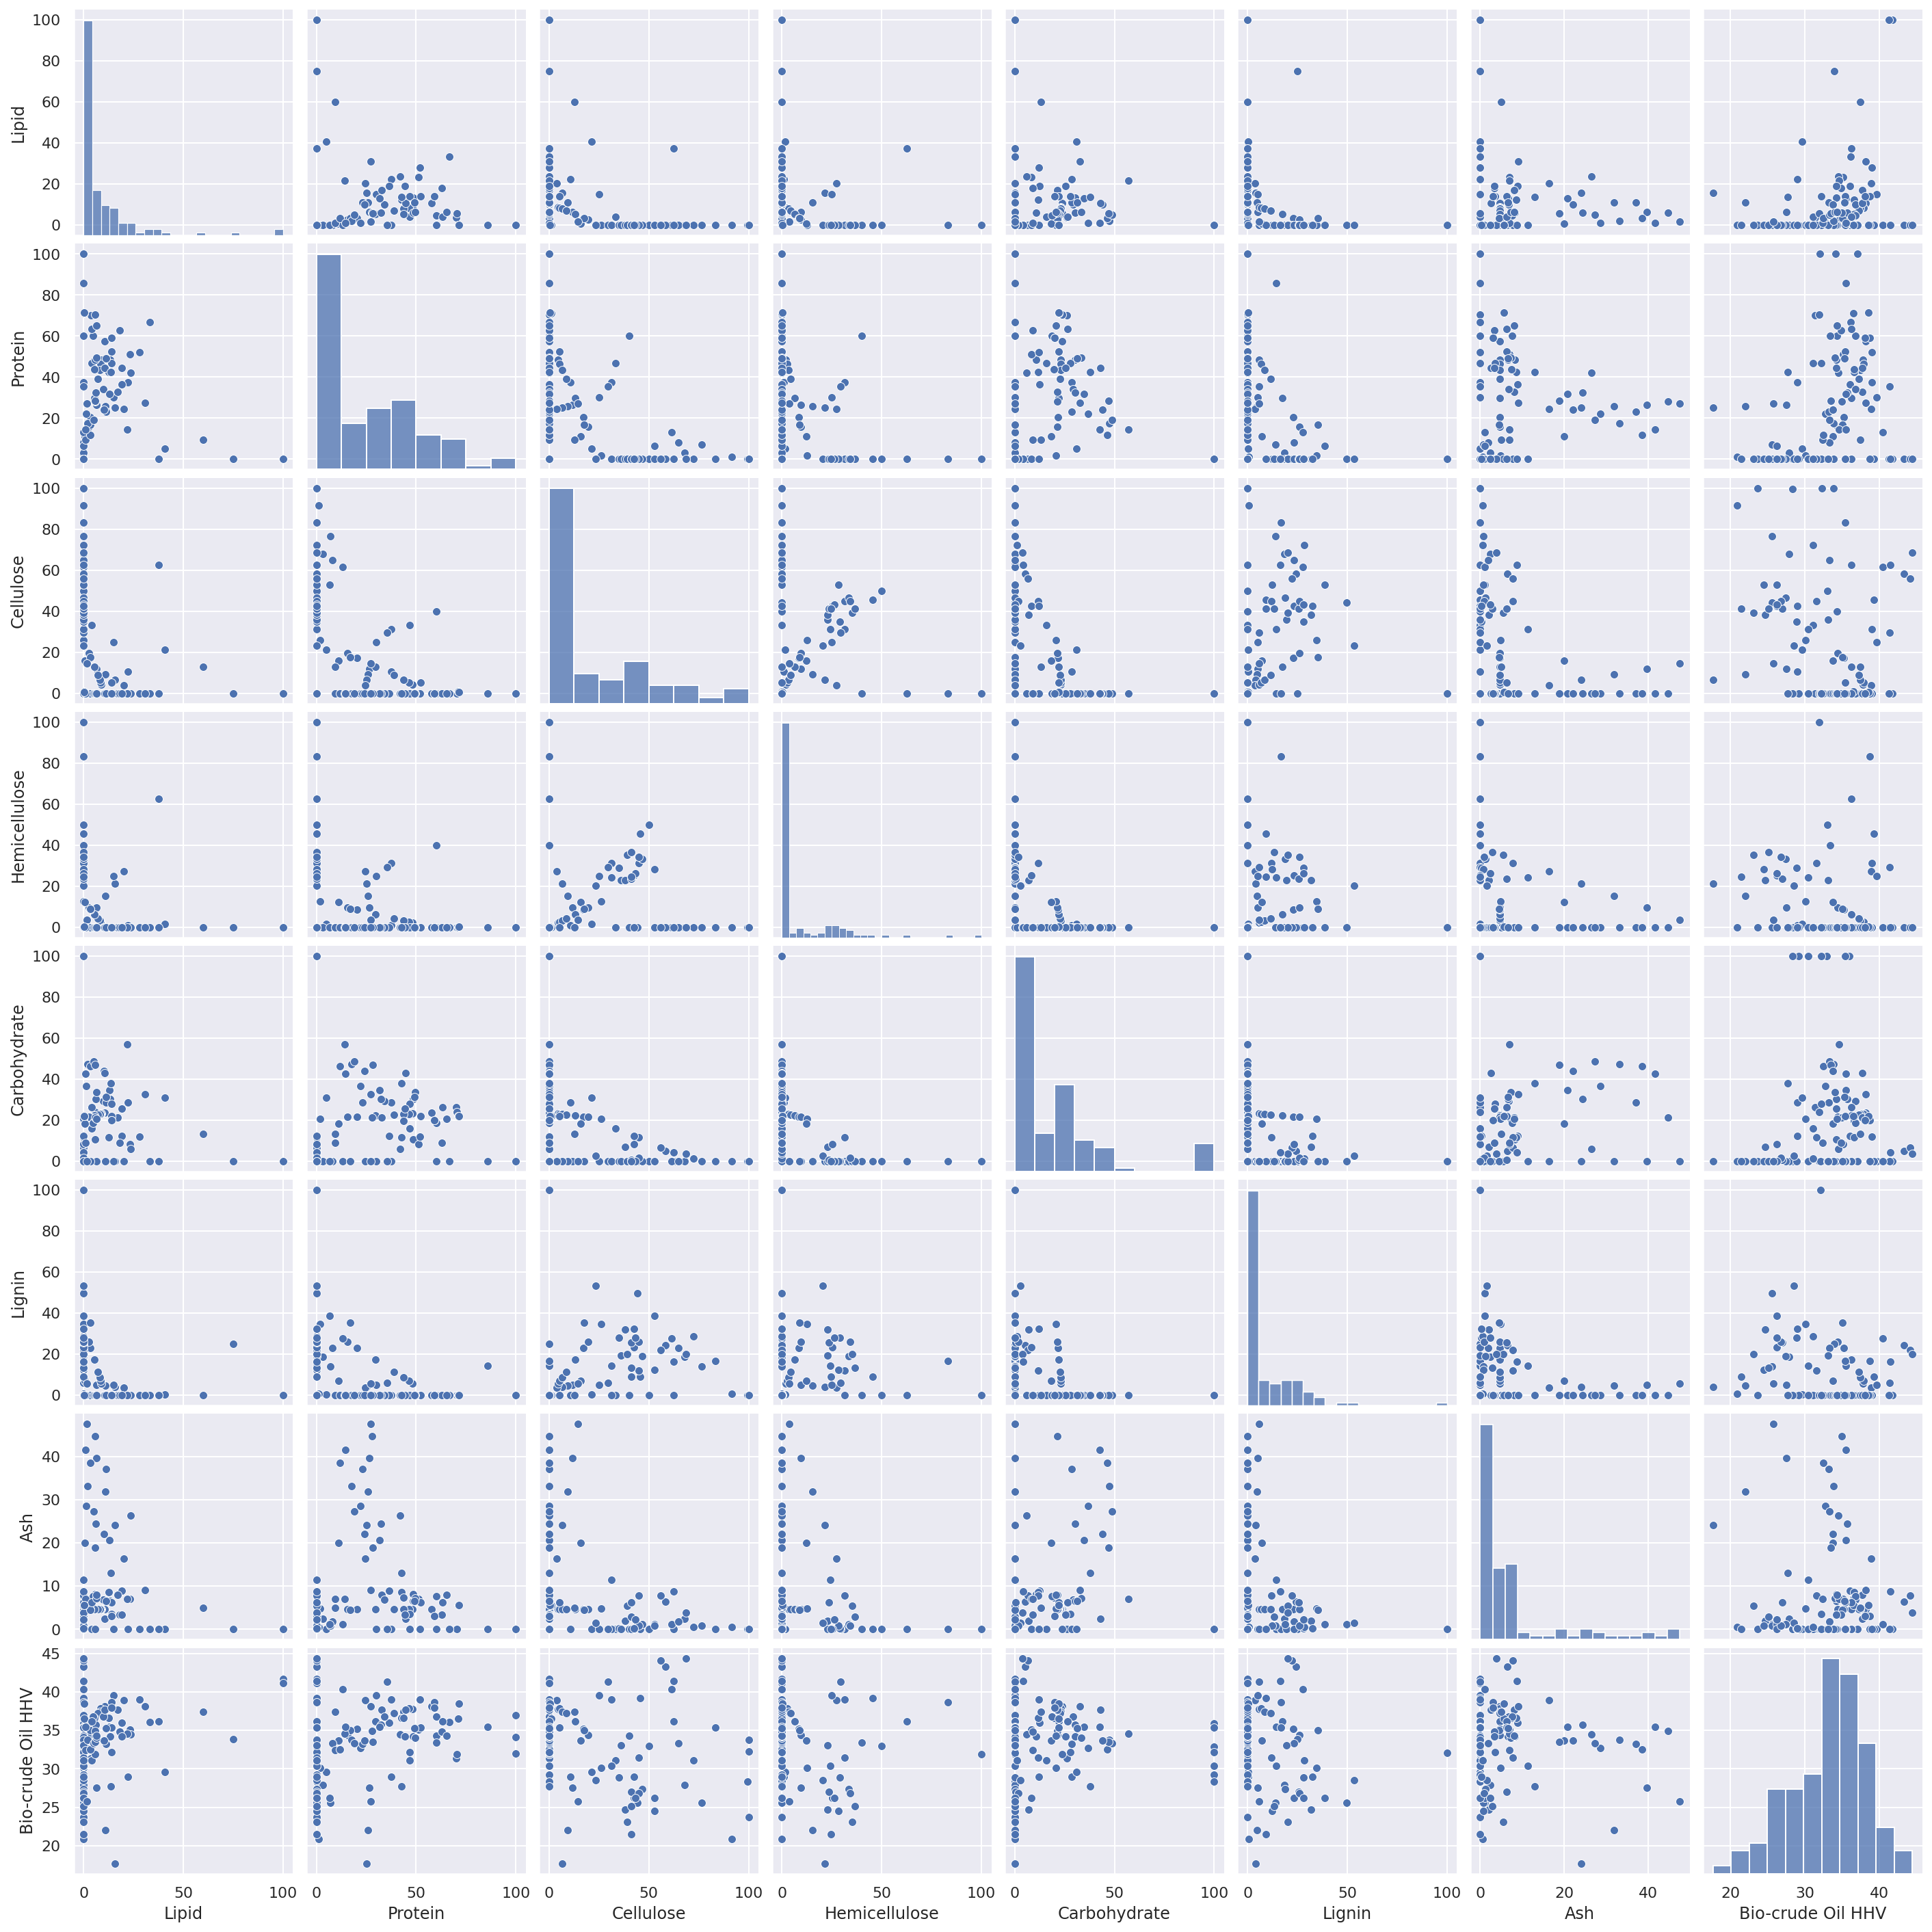

In [12]:
# Scatter plot
import seaborn as sns
import matplotlib.pyplot as plt

# Initialization
sns.set()

# Draw the distribution matrix
sns.pairplot(data)

# save figure
plt.savefig('cHB.png')
plt.show()

(array([1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 2., 2., 5., 0.,
        2., 3., 3., 2., 3., 1., 3., 0., 4., 4., 6., 4., 7., 8., 5., 6., 7.,
        7., 5., 4., 4., 4., 5., 1., 1., 1., 0., 4., 0., 0., 1., 0., 2.]),
 array([17.7  , 18.234, 18.768, 19.302, 19.836, 20.37 , 20.904, 21.438,
        21.972, 22.506, 23.04 , 23.574, 24.108, 24.642, 25.176, 25.71 ,
        26.244, 26.778, 27.312, 27.846, 28.38 , 28.914, 29.448, 29.982,
        30.516, 31.05 , 31.584, 32.118, 32.652, 33.186, 33.72 , 34.254,
        34.788, 35.322, 35.856, 36.39 , 36.924, 37.458, 37.992, 38.526,
        39.06 , 39.594, 40.128, 40.662, 41.196, 41.73 , 42.264, 42.798,
        43.332, 43.866, 44.4  ]),
 <a list of 50 Patch objects>)

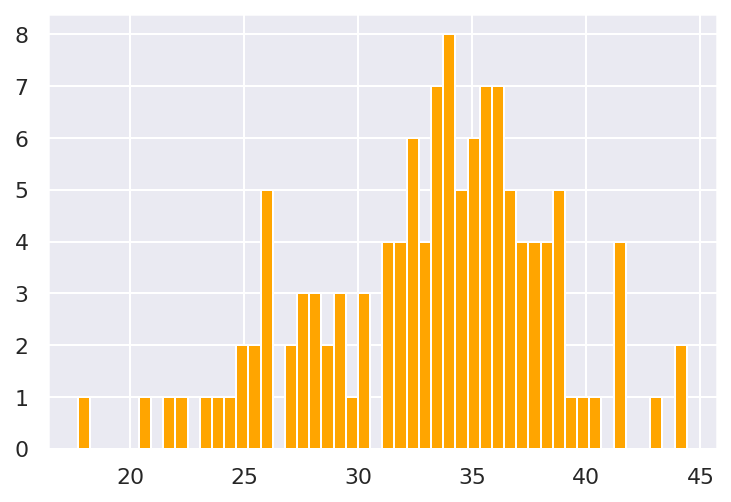

In [13]:
plt.hist(data['Bio-crude Oil HHV'],bins=50,color='orange')

(array([63.,  7.,  9.,  5.,  3.,  7.,  5.,  5.,  1.,  3.,  2.,  3.,  0.,
         0.,  1.,  1.,  1.,  0.,  2.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
         22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
         44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,
         66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,
         88.,  90.,  92.,  94.,  96.,  98., 100.]),
 <a list of 50 Patch objects>)

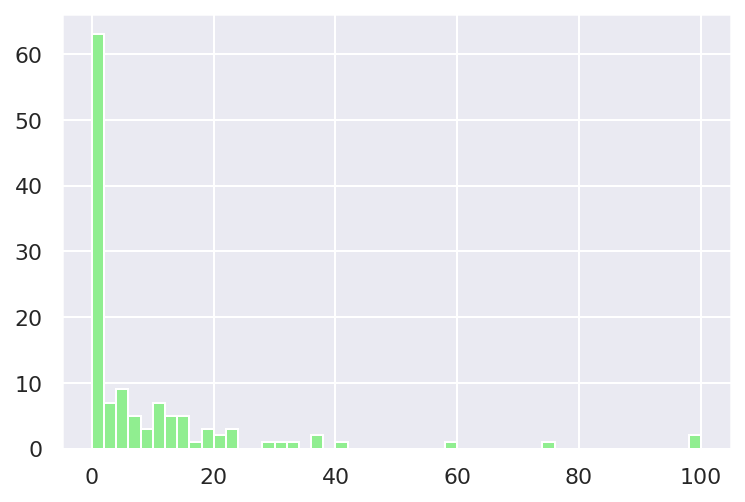

In [14]:
plt.hist(data['Lipid'],bins=50,color='lightgreen')


In [15]:
# As correlation coefficient was estimated, the default is Pearson correlation coefficient.
correlation = data.corr()
correlation

,Lipid,Protein,Cellulose,Hemicellulose,Carbohydrate,Lignin,Ash,Bio-crude Oil HHV
Lipid,1.000000,0.004071,-0.281330,-0.142354,-0.096410,-0.214182,-0.053346,0.284168
Protein,0.004071,1.000000,-0.515486,-0.306655,-0.059095,-0.406277,0.045953,0.288780
Cellulose,-0.281330,-0.515486,1.000000,0.088598,-0.440941,0.316828,-0.278343,-0.272423
...,...,...,...,...,...,...,...,...
Lignin,-0.214182,-0.406277,0.316828,0.137036,-0.325587,1.000000,-0.198828,-0.203227
Ash,-0.053346,0.045953,-0.278343,-0.155231,0.058746,-0.198828,1.000000,-0.110848
Bio-crude Oil HHV,0.284168,0.288780,-0.272423,-0.159297,0.066686,-0.203227,-0.110848,1.000000


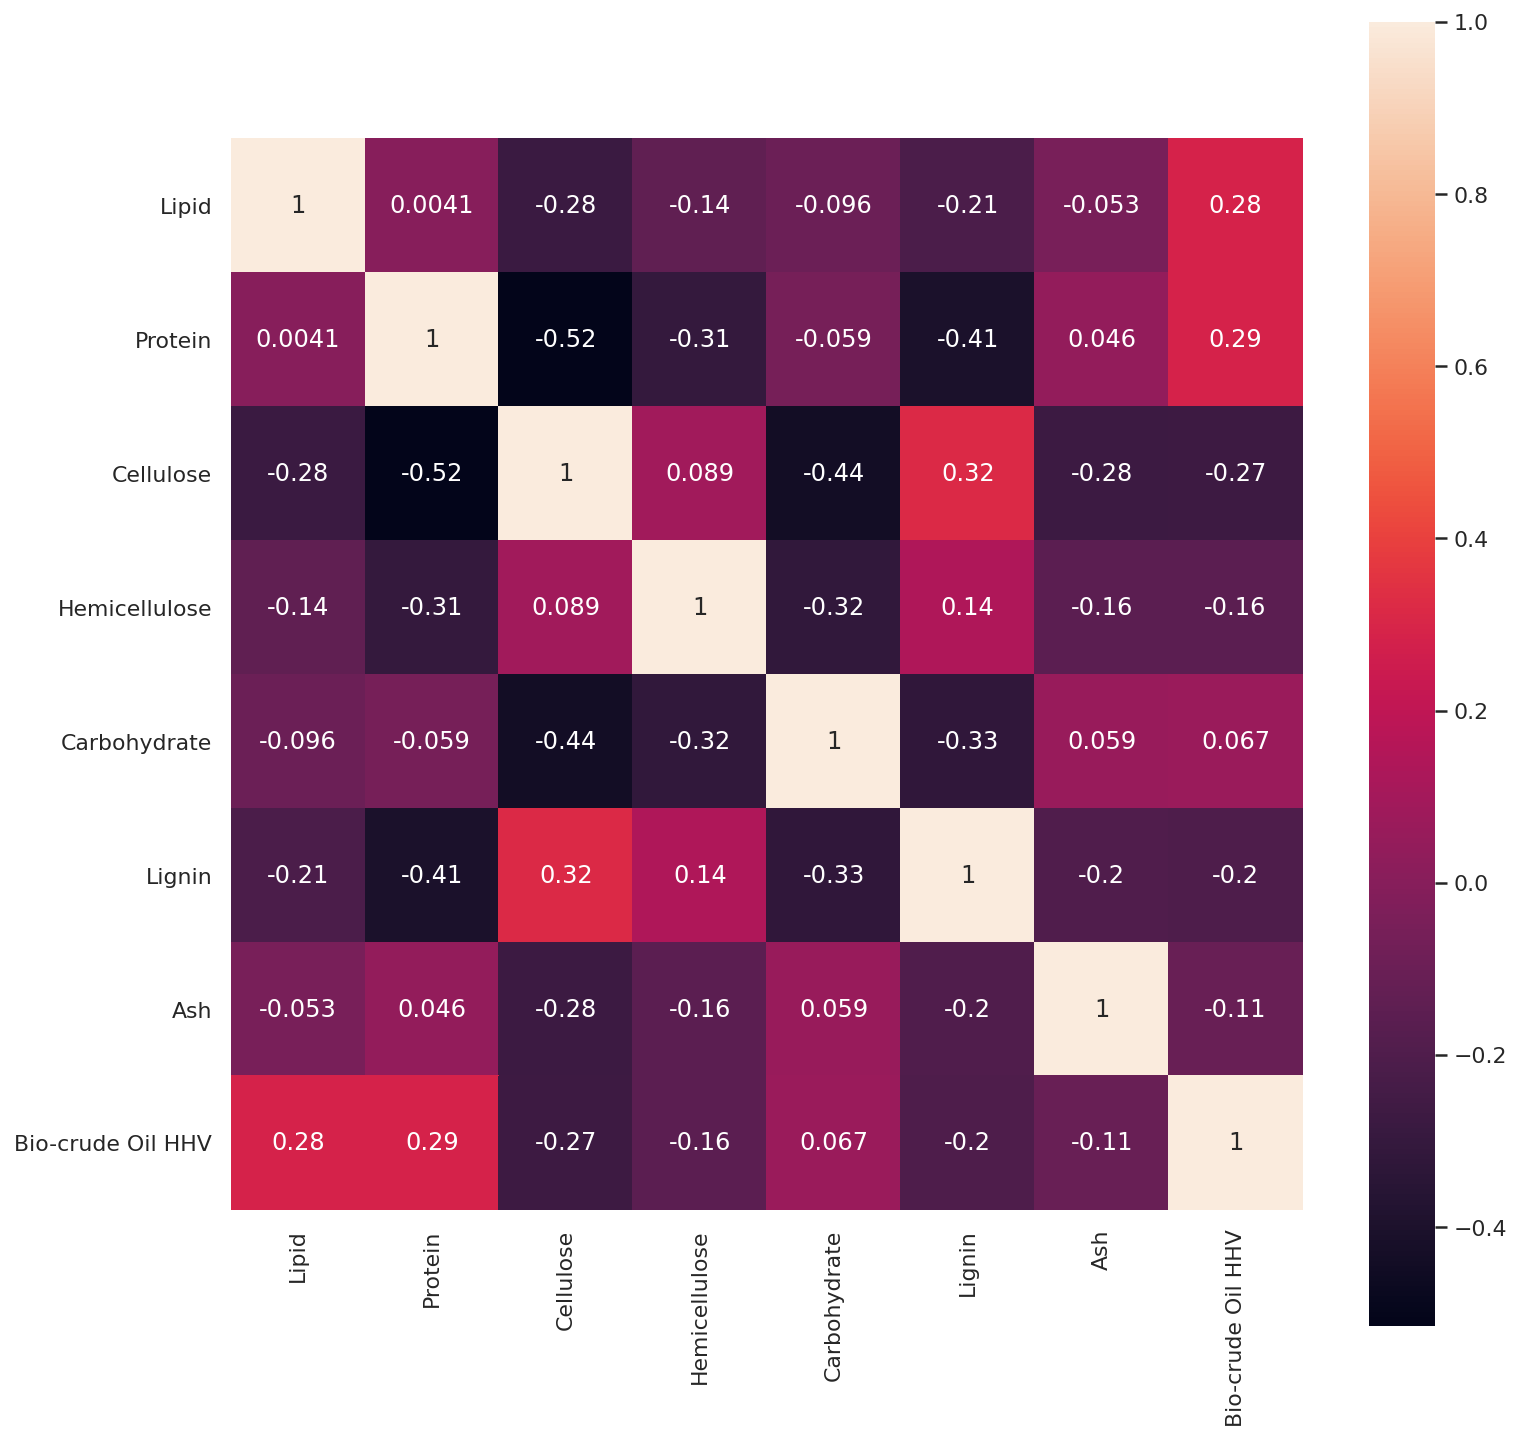

In [16]:
# Correlation
import seaborn as sns
fig=plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),vmax=1,square=True,annot=True)
plt.show()

In [17]:
import numpy as np
# The mean relative error (MRE) is commonly used to measure the predictive accuracy of models.

def performance_metric(y_true, y_predict):
  """Calculates and returns the performance score between 
        true and predicted values based on the metric chosen."""
  # TODO: Calculate the performance score between 'y_true' and 'y_predict'

  return np.mean(np.abs(y_true-y_predict))/np.mean(y_true)


In [18]:
# No use now.
# TODO: Import 'train_test_split'
from sklearn.model_selection import train_test_split
from sklearn import metrics
from math import sqrt

np.random.seed(seed = 154)
data['random'] = np.random.random(size = len(data))

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(Features, Oil_HHV, test_size = 0.333)

# Model set up
from sklearn.linear_model import LinearRegression

# Model instantiation
LR=LinearRegression()

# Model training
LR.fit(X_train,y_train)
print ("Intercept: ",LR.intercept_)
print ("Regression coefficient: ",LR.coef_)

# Predict training set and test set
y_train_predict = LR.predict(X_train)
y_test_predict = LR.predict(X_test)

MAE_train = metrics.mean_absolute_error(y_train, y_train_predict)
MAE_test = metrics.mean_absolute_error(y_test, y_test_predict)

y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))

r2_train = metrics.r2_score(y_train, y_train_predict)
r2_test = metrics.r2_score(y_test, y_test_predict)

MRE_train = performance_metric(y_train, y_train_predict)
MRE_test = performance_metric(y_test, y_test_predict)

print("Optimal model has MAE of training set:", MAE_train)
print("Optimal model has MAE of test set:", MAE_test)
print("Optimal model has RMSE of training set:", y_train_rmse)
print("Optimal model has RMSE of test set:", y_test_rmse)
print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
print("Optimal model has MRE of training set:", MRE_train)
print("Optimal model has MRE of test set:", MRE_test)

Intercept:  30.93063035575137
Regression coefficient:  [ 0.08116665  0.07886622 -0.00080066  0.01931061  0.01348463 -0.00307683
 -0.04676043]
Optimal model has MAE of training set: 3.1465700718663934
Optimal model has MAE of test set: 4.15486553212841
Optimal model has RMSE of training set: 4.182131316310005
Optimal model has RMSE of test set: 5.461991890125446
Optimal model has R2 score of training set 0.24 on training data.
Optimal model has R2 score of test set 0.04 on test data.
Optimal model has MRE of training set: 0.09387278828969085
Optimal model has MRE of test set: 0.127354580455491


In [19]:
# Model set up
from sklearn.linear_model import LinearRegression

# TODO: Import 'KFold'
from sklearn.model_selection import KFold

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

np.random.seed(seed = 154)
data['random'] = np.random.random(size = len(data))


# Lets split the data into 3 folds.  
kf =KFold(n_splits=3, shuffle=True)

cnt = 1

LR_intercept_all=[]
LR_coef_all=[]

MAE_train_all=[]
MAE_test_all=[]
y_train_rmse_all=[]
y_test_rmse_all=[]
r2_train_all=[]
r2_test_all=[]
MRE_train_all=[]
MRE_test_all=[]
y_test_list=[]
y_pred_list=[]

# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(Features, Oil_HHV):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_HHV.iloc[train_index],Oil_HHV.iloc[test_index]
    
    # Model instantiation
    LR=LinearRegression()
    
    # Model training
    LR.fit(X_train,y_train)

    #print ("Intercept: ",LR.intercept_)
    #print ("Regression coefficient: ",LR.coef_)

    # Predict training set and test set
    y_train_predict = LR.predict(X_train)
    y_test_predict = LR.predict(X_test)

    MAE_train = metrics.mean_absolute_error(y_train, y_train_predict)
    MAE_test = metrics.mean_absolute_error(y_test, y_test_predict)

    y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
    y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))

    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    MRE_train = performance_metric(y_train, y_train_predict)
    MRE_test = performance_metric(y_test, y_test_predict)

    # print("Optimal model has MAE of training set:", MAE_train)
    # print("Optimal model has MAE of test set:", MAE_test)
    # print("Optimal model has RMSE of training set:", y_train_rmse)
    # print("Optimal model has RMSE of test set:", y_test_rmse)
    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("Optimal model has MRE of training set:", MRE_train)
    # print("Optimal model has MRE of test set:", MRE_test)
    # print("")

    cnt += 1
    LR_intercept_all.append(LR.intercept_)
    LR_coef_all.append(LR.coef_)
    MAE_train_all.append(MAE_train)
    MAE_test_all.append(MAE_test)
    y_train_rmse_all.append(y_train_rmse)
    y_test_rmse_all.append(y_test_rmse)
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
    MRE_train_all.append(MRE_train)
    MRE_test_all.append(MRE_test)
    y_test_list.append(y_test.values)
    y_pred_list.append(y_test_predict)

y_test_all=np.concatenate(y_test_list, axis=0)
y_pred_all=np.concatenate(y_pred_list, axis=0)

print("Mean value of LR.intercept",np.mean(LR_intercept_all))
print("Standard deviation of LR.intercept",np.std(LR_intercept_all))
print("Mean values of LR.coef",np.mean(LR_coef_all, axis=0))
print("Standard deviations of LR.coef",np.std(LR_coef_all, axis=0))
print("")
print("Mean value of MAE of training set", np.mean(MAE_train_all))
print("Standard deviation of MAE of training set", np.std(MAE_train_all))
print("Mean value of MAE of test set", np.mean(MAE_test_all))
print("Standard deviation of MAE of test set", np.std(MAE_test_all))
print("")
print("Mean value of RMSE of training set", np.mean(y_train_rmse_all))
print("Standard deviation of RMSE of training set", np.std(y_train_rmse_all))
print("Mean value of RMSE of test set", np.mean(y_test_rmse_all))
print("Standard deviation of RMSE of test set", np.std(y_test_rmse_all))
print("")
print("Mean value of R2 of training set", np.mean(r2_train_all))
print("Standard deviation of R2 of training set", np.std(r2_train_all))
print("Mean value of R2 of test set", np.mean(r2_test_all))
print("Standard deviation of R2 of test set", np.std(r2_test_all))
print("")
print("Mean value of MRE of training set", np.mean(MRE_train_all))
print("Standard deviation of MRE of training set", np.std(MRE_train_all))
print("Mean value of MRE of test set", np.mean(MRE_test_all))
print("Standard deviation of MRE of test set", np.std(MRE_test_all))

#print(len(np.concatenate(y_test_list, axis=0)))
#print(len(np.concatenate(y_pred_list, axis=0)))

Mean value of LR.intercept 35.565533304947245
Standard deviation of LR.intercept 3.9989910854801836
Mean values of LR.coef [ 0.04211446  0.01091114 -0.04952956 -0.04499805 -0.02332441 -0.04853898
 -0.10215693]
Standard deviations of LR.coef [0.03298928 0.0528017  0.04223644 0.04670168 0.03324033 0.04688444
 0.05038627]

Mean value of MAE of training set 3.37892348745916
Standard deviation of MAE of training set 0.21579200403389118
Mean value of MAE of test set 3.6849847551232244
Standard deviation of MAE of test set 0.39610461907445976

Mean value of RMSE of training set 4.508031234424906
Standard deviation of RMSE of training set 0.28114727895617864
Mean value of RMSE of test set 4.795088828860262
Standard deviation of RMSE of test set 0.5950661458348725

Mean value of R2 of training set 0.21210815772974864
Standard deviation of R2 of training set 0.031054261635826922
Mean value of R2 of test set 0.09901790305987161
Standard deviation of R2 of test set 0.06417710081948207

Mean value 

Text(0.5, 1.0, 'y_pred vs. y_true')

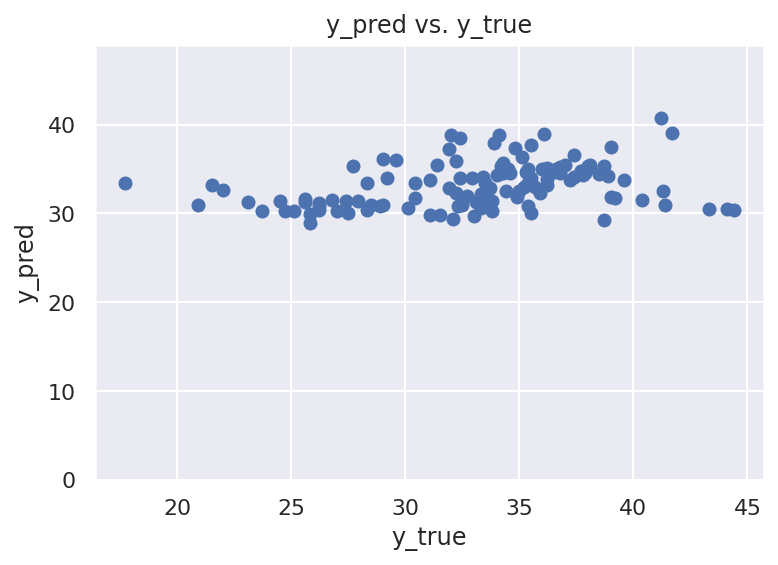

In [20]:
import matplotlib.pyplot as py
py.plot(y_test_all, y_pred_all, 'bo')
py.ylim(0, 49)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

In [ ]:
Parity={'Predict Data':y_pred_all,'Test Data':y_test_all}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_HHV_MLR.csv', index = False, header=True)

In [21]:
# Linearity test
from pandas import Series
from scipy.stats import f

from scipy.stats import t

# Model set up
from sklearn.linear_model import LinearRegression

# TODO: Import 'KFold'
from sklearn.model_selection import KFold

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

np.random.seed(seed = 154)
data['random'] = np.random.random(size = len(data))


# Lets split the data into 3 folds.  
kf =KFold(n_splits=3, shuffle=True)

cnt = 1

y_train_f_all=[]
p_all=[]
cr_value_all=[]

limit_all=[]

tvalue1_all=[]
pvalue1_all=[]
tvalue2_all=[]
pvalue2_all=[]
tvalue3_all=[]
pvalue3_all=[]
tvalue4_all=[]
pvalue4_all=[]
tvalue5_all=[]
pvalue5_all=[]
tvalue6_all=[]
pvalue6_all=[]
tvalue7_all=[]
pvalue7_all=[]



# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(Features, Oil_HHV):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = Features.iloc[train_index,:],Features.iloc[test_index,:]
    y_train, y_test = Oil_HHV.iloc[train_index],Oil_HHV.iloc[test_index]
    
    # Model instantiation
    LR=LinearRegression()
    
    # Model training
    LR.fit(X_train,y_train)

    #print ("Intercept: ",LR.intercept_)
    #print ("Regression coefficient: ",LR.coef_)

    # Predict training set and test set
    y_train_predict = LR.predict(X_train)
    y_test_predict = LR.predict(X_test)

    # array was converted into series format
    y_train_predict = Series(y_train_predict, index=y_train.index)
    
    # SSR and SSE were estimated in the training data
    y_train_ssr = y_train_predict.apply(lambda x:(x-y_train.mean())**2).sum()
    y_train_sse = y_train.sub(y_train_predict).apply(lambda x:x**2).sum()
    
    # dn is the degree of freedom of SSR, df is the degree of freedom of SSE 
    dn = 7
    df = y_train.shape[0] - dn - 1
    
    # F value is estimated
    y_train_f = (y_train_ssr/dn)/(y_train_sse/df)
    
    # P value is estimated
    p = f.sf(y_train_f, dn, df)
    
    # Critical value of significance level of 0.05 was estimated
    cr_value = f.isf(0.05,dn,df)
    
    # print('F value of training set: ',y_train_f)
    # print('P value of training set:%.02f'%p)
    # print('Critical value of significance level of 0.05: ',cr_value)
    
    def get_tvalue(sse,df,matr,beta,i):
      '''t value is estimated'''
      mse = sse / df
      sbeta = sqrt(matr[i+1,i+1]*mse)
      t=beta/sbeta
      return t
    
    limit = t.isf(0.025,df)
    #print('Critical value of significance level of 0.05:',limit)
    
    X_train['B']=1
    X_train = X_train.reindex(columns=['B','Lipid','Protein','Cellulose','Hemicellulose','Carbohydrate','Lignin','Ash'])
    
    # Matrix Conversion
    xm = np.mat(X_train)
    
    # Inverse matrix (X' X) was estimated
    xmi = np.dot(xm.T, xm).I
    index,betas = range(7),LR.coef_
    
    tvalue1 = get_tvalue(y_train_sse,df,xmi,LR.coef_[0],0)
    pvalue1 = t.sf(abs(tvalue1),df)*2
    #print('t value of beta 1:',tvalue1)
    #print('p value of beta 1:',pvalue1)
    
    tvalue2 = get_tvalue(y_train_sse,df,xmi,LR.coef_[1],1)
    pvalue2 = t.sf(abs(tvalue2),df)*2
    #print('t value of beta 2:',tvalue2)
    #print('p value of beta 2:',pvalue2)
    
    tvalue3 = get_tvalue(y_train_sse,df,xmi,LR.coef_[2],2)
    pvalue3 = t.sf(abs(tvalue3),df)*2
    #print('t value of beta 3:',tvalue3)
    #print('p value of beta 3:',pvalue3)
    
    tvalue4 = get_tvalue(y_train_sse,df,xmi,LR.coef_[3],3)
    pvalue4 = t.sf(abs(tvalue4),df)*2
    #print('t value of beta 4:',tvalue4)
    #print('p value of beta 4:',pvalue4)
    
    tvalue5 = get_tvalue(y_train_sse,df,xmi,LR.coef_[4],4)
    pvalue5 = t.sf(abs(tvalue5),df)*2
    #print('t value of beta 5:',tvalue5)
    #print('p value of beta 5:',pvalue5)
    
    tvalue6 = get_tvalue(y_train_sse,df,xmi,LR.coef_[5],5)
    pvalue6 = t.sf(abs(tvalue6),df)*2
    #print('t value of beta 6:',tvalue6)
    #print('p value of beta 6:',pvalue6)
    
    tvalue7 = get_tvalue(y_train_sse,df,xmi,LR.coef_[6],6)
    pvalue7 = t.sf(abs(tvalue7),df)*2
    #print('t value of beta 7:',tvalue7)
    #print('p value of beta 7:',pvalue7)

    cnt += 1
    y_train_f_all.append(y_train_f)
    p_all.append(p)
    cr_value_all.append(cr_value)

    limit_all.append(limit)

    tvalue1_all.append(tvalue1)
    pvalue1_all.append(pvalue1)
    tvalue2_all.append(tvalue2)
    pvalue2_all.append(pvalue2)
    tvalue3_all.append(tvalue3)
    pvalue3_all.append(pvalue3)    
    tvalue4_all.append(tvalue4)
    pvalue4_all.append(pvalue4)
    tvalue5_all.append(tvalue5)
    pvalue5_all.append(pvalue5)    
    tvalue6_all.append(tvalue6)
    pvalue6_all.append(pvalue6)
    tvalue7_all.append(tvalue7)
    pvalue7_all.append(pvalue7)

print("Mean value of F value of training set:",np.mean(y_train_f_all))
print("Standard deviation of F value of training set:",np.std(y_train_f_all))
print("Mean values of P value of training set:",np.mean(p_all))
print("Standard deviations of P value of training set:",np.std(p_all))
print("Mean value of Critical value of significance level of 0.05:", np.mean(cr_value_all))
print("Standard deviation of Critical value of significance level of 0.05:", np.std(cr_value_all))
print("")
print("Mean value of critical value of significance level of 0.05:",np.mean(limit_all))
print("Standard deviation of critical value of significance level of 0.05:",np.std(limit_all))
print("")
print("Mean value of t value of beta 1:",np.mean(tvalue1_all))
print("Standard deviation of t value of beta 1:",np.std(tvalue1_all))
print("Mean value of p value of beta 1:",np.mean(pvalue1_all))
print("Standard deviation of p value of beta 1:",np.std(pvalue1_all))
print("")
print("Mean value of t value of beta 2:",np.mean(tvalue2_all))
print("Standard deviation of t value of beta 2:",np.std(tvalue2_all))
print("Mean value of p value of beta 2:",np.mean(pvalue2_all))
print("Standard deviation of p value of beta 2:",np.std(pvalue2_all))
print("")
print("Mean value of t value of beta 3:",np.mean(tvalue3_all))
print("Standard deviation of t value of beta 3:",np.std(tvalue3_all))
print("Mean value of p value of beta 3:",np.mean(pvalue3_all))
print("Standard deviation of p value of beta 3:",np.std(pvalue3_all))
print("")
print("Mean value of t value of beta 4:",np.mean(tvalue4_all))
print("Standard deviation of t value of beta 4:",np.std(tvalue4_all))
print("Mean value of p value of beta 4:",np.mean(pvalue4_all))
print("Standard deviation of p value of beta 4:",np.std(pvalue4_all))
print("")
print("Mean value of t value of beta 5:",np.mean(tvalue5_all))
print("Standard deviation of t value of beta 5:",np.std(tvalue5_all))
print("Mean value of p value of beta 5:",np.mean(pvalue5_all))
print("Standard deviation of p value of beta 5:",np.std(pvalue5_all))
print("")
print("Mean value of t value of beta 6:",np.mean(tvalue6_all))
print("Standard deviation of t value of beta 6:",np.std(tvalue6_all))
print("Mean value of p value of beta 6:",np.mean(pvalue6_all))
print("Standard deviation of p value of beta 6:",np.std(pvalue6_all))
print("")
print("Mean value of t value of beta 7:",np.mean(tvalue7_all))
print("Standard deviation of t value of beta 7:",np.std(tvalue7_all))
print("Mean value of p value of beta 7:",np.mean(pvalue7_all))
print("Standard deviation of p value of beta 7:",np.std(pvalue7_all))

Mean value of F value of training set: 2.866376868177289
Standard deviation of F value of training set: 0.518814606678387
Mean values of P value of training set: 0.019456024940371183
Standard deviations of P value of training set: 0.02022741061146862
Mean value of Critical value of significance level of 0.05: 2.1360451829054803
Standard deviation of Critical value of significance level of 0.05: 0.0

Mean value of critical value of significance level of 0.05: 1.9925434948468201
Standard deviation of critical value of significance level of 0.05: 2.220446049250313e-16

Mean value of t value of beta 1: 0.7262410956378386
Standard deviation of t value of beta 1: 0.5892181310265293
Mean value of p value of beta 1: 0.5394592536568995
Standard deviation of p value of beta 1: 0.34782504792203073

Mean value of t value of beta 2: 0.3024057331008358
Standard deviation of t value of beta 2: 0.884846022578771
Mean value of p value of beta 2: 0.5383618555701725
Standard deviation of p value of beta 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [ ]:
# No use now.
from scipy.stats import t
def get_tvalue(sse,df,matr,beta,i):
  '''t value is estimated'''
  mse = sse / df
  sbeta = sqrt(matr[i+1,i+1]*mse)
  t=beta/sbeta
  return t

limit = t.isf(0.025,df)
print('Critical value of significance level of 0.05:',limit)

X_train['B']=1
X_train = X_train.reindex(columns=['B','Lipid','Protein','Cellulose','Hemicellulose','Carbohydrate','Lignin','Ash'])

# Matrix Conversion
xm = np.mat(X_train)
# Inverse matrix (X' X) was estimated
xmi = np.dot(xm.T, xm).I
index,betas = range(7),LR.coef_
for i,beta in zip(index,betas):
  tvalue = get_tvalue(y_train_sse,df,xmi,beta,i)
  pvalue = t.sf(abs(tvalue),df)*2
  print('t value of beta {0}:'.format(i+1),tvalue)
  print('p value of beta {0}:'.format(i+1),pvalue)

Critical value of significance level of 0.05: 1.9738521694896138
t value of beta 1: 7.906727317908357
p value of beta 1: 3.051942527736688e-13
t value of beta 2: 0.5349233069620932
p value of beta 2: 0.593393753585497
t value of beta 3: -1.22148604882896
p value of beta 3: 0.22357361069937173
t value of beta 4: -1.4756312520006964
p value of beta 4: 0.14187118824092604
t value of beta 5: -1.904900178784825
p value of beta 5: 0.058461797886129804
t value of beta 6: -2.559159266362959
p value of beta 6: 0.011353796025142478
t value of beta 7: -1.7444270031922708
p value of beta 7: 0.08287096532486027


In [22]:
# 1.Delete collinear variable
import pandas as pd
data = pd.read_csv('/content/Feed Effect on Biocrude HHV Data ML 111020.csv')

# Model set up
from sklearn.linear_model import LinearRegression

# TODO: Import 'KFold'
from sklearn.model_selection import KFold

# TODO Calculate the r2 score between 'y_true' and 'y_predict'
from math import sqrt
from sklearn import metrics

# 1.Delete collinear variable
# Assign data set
X1, y1 = data[['Lipid','Protein','Hemicellulose','Carbohydrate','Lignin','Ash']], data['Bio-crude Oil HHV']

np.random.seed(seed = 154)
data['random'] = np.random.random(size = len(data))

# Lets split the data into 3 folds.  
kf =KFold(n_splits=3, shuffle=True)

cnt = 1

LR_intercept_all=[]
LR_coef_all=[]

MAE_train_all=[]
MAE_test_all=[]
y_train_rmse_all=[]
y_test_rmse_all=[]
r2_train_all=[]
r2_test_all=[]
MRE_train_all=[]
MRE_test_all=[]
y_test_list=[]
y_pred_list=[]

y_p_all=[]

pvalue1_all=[]
pvalue2_all=[]
pvalue3_all=[]
pvalue4_all=[]
pvalue5_all=[]
pvalue6_all=[]


# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X1, y1):
    # print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    
    #fixed by Wenjing
    X_train, X_test = X1.iloc[train_index,:],X1.iloc[test_index,:]
    y_train, y_test = y1.iloc[train_index],y1.iloc[test_index]
    
    # Train the model, predict and estimate root_mean_square_error (RMSE) and Multiple coefficient of determination (R2)
    LR = LinearRegression()
    LR.fit(X_train, y_train)
    inter,co = LR.intercept_, LR.coef_
    #print ("Intercept: ",LR.intercept_)
    #print ("Regression coefficient: ",LR.coef_)

    # Predict training set and test set
    y_train_predict = LR.predict(X_train)
    y_test_predict = LR.predict(X_test)

    MAE_train = metrics.mean_absolute_error(y_train, y_train_predict)
    MAE_test = metrics.mean_absolute_error(y_test, y_test_predict)

    y_train_rmse = sqrt(metrics.mean_squared_error(y_train, y_train_predict))
    y_test_rmse = sqrt(metrics.mean_squared_error(y_test, y_test_predict))

    r2_train = metrics.r2_score(y_train, y_train_predict)
    r2_test = metrics.r2_score(y_test, y_test_predict)

    MRE_train = performance_metric(y_train, y_train_predict)
    MRE_test = performance_metric(y_test, y_test_predict)

    # print("Optimal model has MAE of training set:", MAE_train)
    # print("Optimal model has MAE of test set:", MAE_test)
    # print("Optimal model has RMSE of training set:", y_train_rmse)
    # print("Optimal model has RMSE of test set:", y_test_rmse)
    # print("Optimal model has R2 score of training set {:,.2f} on training data.".format(r2_train))
    # print("Optimal model has R2 score of test set {:,.2f} on test data.".format(r2_test))
    # print("Optimal model has MRE of training set:", MRE_train)
    # print("Optimal model has MRE of test set:", MRE_test)
    # print("")
    
    # Estimate P value of significance level of 0.05 in F test
    y_train_predict = Series(y_train_predict, index=y_train.index)
    y_train_ssr = y_train_predict.apply(lambda x:(x-y_train.mean())**2).sum()
    y_train_sse = y_train.sub(y_train_predict).apply(lambda x:x**2).sum()
    dn, df = 6, y_train.shape[0]-6-1
    y_train_f = (y_train_ssr/dn) / (y_train_sse/df)
    y_p = f.sf(y_train_f, dn, df)
    # print('P value of training set under significance level of 0.05 in F test：%.20f'% y_p)
    
    # Estimate p value under significance level of 0.05 in t test
    def get_t1value(sse,df,matr,beta,i):
      mse = sse / df
      sbeta = sqrt(matr[i+1,i+1]*mse)
      t = beta / sbeta
      return t
      
    X_train['B'] = 1
    X_train = X_train.reindex(columns=['B','Lipid','Protein','Hemicellulose','Carbohydrate','Lignin','Ash'])
    xm = np.mat(X_train)
    xmi = np.dot(xm.T,xm).I
    index, betas = range(6), LR.coef_

    tvalue1 = get_tvalue(y_train_sse,df,xmi,LR.coef_[0],0)
    pvalue1 = t.sf(abs(tvalue1),df)*2
    #print('t value of beta 1:',tvalue1)
    #print('P value of beta 1 under significance level of 0.05 in t test:',pvalue1)
    
    tvalue2 = get_tvalue(y_train_sse,df,xmi,LR.coef_[1],1)
    pvalue2 = t.sf(abs(tvalue2),df)*2
    #print('t value of beta 2:',tvalue2)
    #print('P value of beta 2 under significance level of 0.05 in t test:',pvalue2)
    
    tvalue3 = get_tvalue(y_train_sse,df,xmi,LR.coef_[2],2)
    pvalue3 = t.sf(abs(tvalue3),df)*2
    #print('t value of beta 3:',tvalue3)
    #print('P value of beta 3 under significance level of 0.05 in t test:',pvalue3)
    
    tvalue4 = get_tvalue(y_train_sse,df,xmi,LR.coef_[3],3)
    pvalue4 = t.sf(abs(tvalue4),df)*2
    #print('t value of beta 4:',tvalue4)
    #print('P value of beta 4 under significance level of 0.05 in t test:',pvalue4)
    
    tvalue5 = get_tvalue(y_train_sse,df,xmi,LR.coef_[4],4)
    pvalue5 = t.sf(abs(tvalue5),df)*2
    #print('t value of beta 5:',tvalue5)
    #print('P value of beta 5 under significance level of 0.05 in t test:',pvalue5)
    
    tvalue6 = get_tvalue(y_train_sse,df,xmi,LR.coef_[5],5)
    pvalue6 = t.sf(abs(tvalue6),df)*2
    #print('t value of beta 6:',tvalue6)
    #print('P value of beta 6 under significance level of 0.05 in t test:',pvalue6)

    cnt += 1
    LR_intercept_all.append(LR.intercept_)
    LR_coef_all.append(LR.coef_)
    MAE_train_all.append(MAE_train)
    MAE_test_all.append(MAE_test)
    y_train_rmse_all.append(y_train_rmse)
    y_test_rmse_all.append(y_test_rmse)
    r2_train_all.append(r2_train)
    r2_test_all.append(r2_test)
    MRE_train_all.append(MRE_train)
    MRE_test_all.append(MRE_test)
    y_test_list.append(y_test.values)
    y_pred_list.append(y_test_predict)  

    y_p_all.append(p)

    pvalue1_all.append(pvalue1)
    pvalue2_all.append(pvalue2)
    pvalue3_all.append(pvalue3)    
    pvalue4_all.append(pvalue4)
    pvalue5_all.append(pvalue5)    
    pvalue6_all.append(pvalue6)

y_test_all=np.concatenate(y_test_list, axis=0)
y_pred_all=np.concatenate(y_pred_list, axis=0)

print("Mean value of LR.intercept",np.mean(LR_intercept_all))
print("Standard deviation of LR.intercept",np.std(LR_intercept_all))
print("Mean values of LR.coef",np.mean(LR_coef_all, axis=0))
print("Standard deviations of LR.coef",np.std(LR_coef_all, axis=0))
print("")
print("Mean value of MAE of training set", np.mean(MAE_train_all))
print("Standard deviation of MAE of training set", np.std(MAE_train_all))
print("Mean value of MAE of test set", np.mean(MAE_test_all))
print("Standard deviation of MAE of test set", np.std(MAE_test_all))
print("")
print("Mean value of RMSE of training set", np.mean(y_train_rmse_all))
print("Standard deviation of RMSE of training set", np.std(y_train_rmse_all))
print("Mean value of RMSE of test set", np.mean(y_test_rmse_all))
print("Standard deviation of RMSE of test set", np.std(y_test_rmse_all))
print("")
print("Mean value of R2 of training set", np.mean(r2_train_all))
print("Standard deviation of R2 of training set", np.std(r2_train_all))
print("Mean value of R2 of test set", np.mean(r2_test_all))
print("Standard deviation of R2 of test set", np.std(r2_test_all))
print("")
print("Mean value of MRE of training set", np.mean(MRE_train_all))
print("Standard deviation of MRE of training set", np.std(MRE_train_all))
print("Mean value of MRE of test set", np.mean(MRE_test_all))
print("Standard deviation of MRE of test set", np.std(MRE_test_all))
print("")

print("Mean values of P value of training set under significance level of 0.05 in F test：",np.mean(y_p_all))
print("Standard deviations of P value of training set under significance level of 0.05 in F test：",np.std(y_p_all))
print("")


print("Mean value of P value of beta 1 under significance level of 0.05 in t test:",np.mean(pvalue1_all))
print("Standard deviation of P value of beta 1 under significance level of 0.05 in t test:",np.std(pvalue1_all))
print("")

print("Mean value of P value of beta 2 under significance level of 0.05 in t test:",np.mean(pvalue2_all))
print("Standard deviation of P value of beta 2 under significance level of 0.05 in t test:",np.std(pvalue2_all))
print("")

print("Mean value of P value of beta 3 under significance level of 0.05 in t test:",np.mean(pvalue3_all))
print("Standard deviation of P value of beta 3 under significance level of 0.05 in t test:",np.std(pvalue3_all))
print("")

print("Mean value of P value of beta 4 under significance level of 0.05 in t test:",np.mean(pvalue4_all))
print("Standard deviation of P value of beta 4 under significance level of 0.05 in t test:",np.std(pvalue4_all))
print("")

print("Mean value of P value of beta 5 under significance level of 0.05 in t test:",np.mean(pvalue5_all))
print("Standard deviation of P value of beta 5 under significance level of 0.05 in t test:",np.std(pvalue5_all))
print("")

print("Mean value of P value of beta 6 under significance level of 0.05 in t test:",np.mean(pvalue6_all))
print("Standard deviation of P value of beta 6 under significance level of 0.05 in t test:",np.std(pvalue6_all))

#print(len(np.concatenate(y_test_list, axis=0)))
#print(len(np.concatenate(y_pred_list, axis=0)))

Mean value of LR.intercept 31.124368174741075
Standard deviation of LR.intercept 0.1948074465580005
Mean values of LR.coef [ 0.08754861  0.05745101 -0.00173066  0.02138169 -0.00656981 -0.05499629]
Standard deviations of LR.coef [0.00656745 0.01573994 0.01876456 0.00541372 0.01346292 0.00981361]

Mean value of MAE of training set 3.4090236731027095
Standard deviation of MAE of training set 0.22084244285509666
Mean value of MAE of test set 3.631250408537936
Standard deviation of MAE of test set 0.39362668595927625

Mean value of RMSE of training set 4.532323173623598
Standard deviation of RMSE of training set 0.28767770319967706
Mean value of RMSE of test set 4.742549354198265
Standard deviation of RMSE of test set 0.5904570947200711

Mean value of R2 of training set 0.20367961146178296
Standard deviation of R2 of training set 0.032365986747325146
Mean value of R2 of test set 0.1185372563163627
Standard deviation of R2 of test set 0.06276206691689597

Mean value of MRE of training set 0.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

Text(0.5, 1.0, 'y_pred vs. y_true')

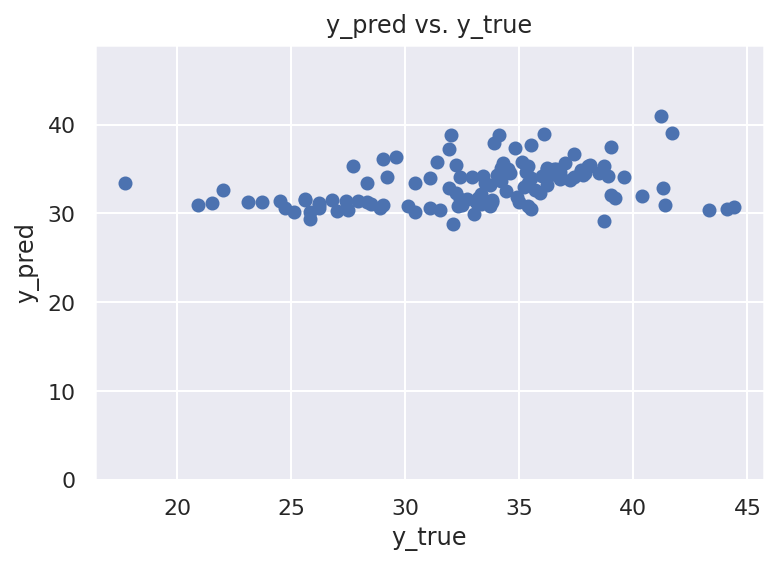

In [24]:
import matplotlib.pyplot as py
py.plot(y_test_all, y_pred_all, 'bo')
py.ylim(0, 49)
py.xlabel('y_true')
py.ylabel('y_pred')
py.title('y_pred vs. y_true')

In [ ]:
Parity={'Predict Data':y_pred_all,'Test Data':y_test_all}
df = pd.DataFrame(Parity, columns= ['Predict Data', 'Test Data'])
df.to_csv (r'/content/export_dataframe_HHV_MLR_DCV.csv', index = False, header=True)

RMSE of test set: 9.55163670623
Fit goodness of test set: 0.6385616589753638


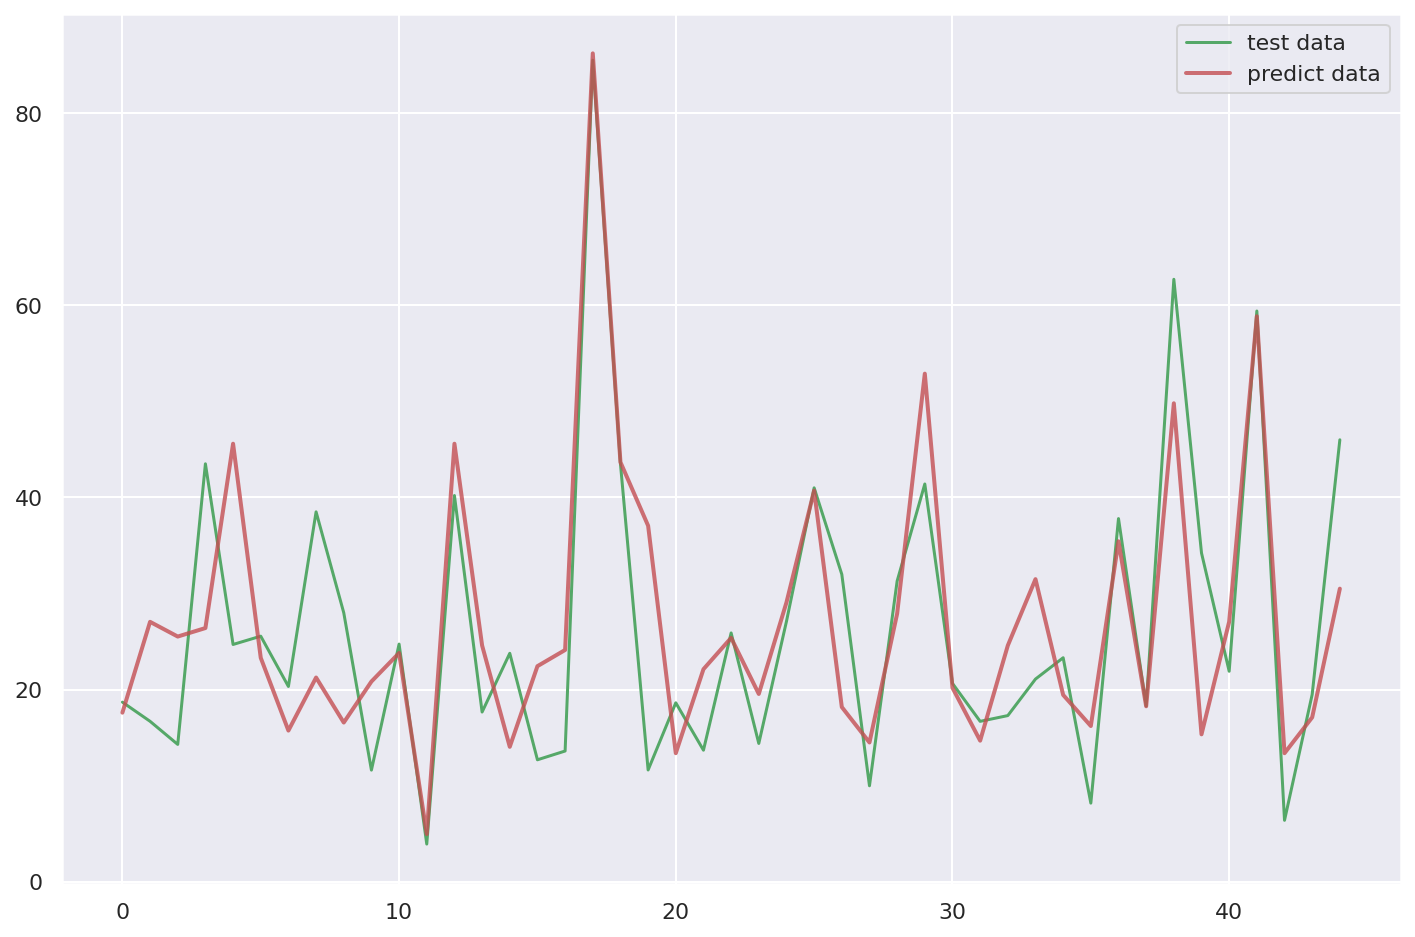

In [ ]:
# No use now.
# Model application
import matplotlib.pyplot as plt

# Prediction by the well-trained model
y1_test_pred = LR1.predict(X1_test)
y1_test_rmse = sqrt(metrics.mean_squared_error(y1_test,y1_test_pred))
y1_test_score = LR1.score(X1_test,y1_test)
print('RMSE of test set:', y1_test_rmse)
print('Fit goodness of test set:',y1_test_score)

# Draw plot
plt.figure(figsize=(12,8))
plt.plot(range(len(y1_test)),y1_test,'g',label='test data')
plt.plot(range(len(y1_test_pred)),y1_test_pred,'r',label='predict data',linewidth=2,alpha=0.8)
plt.legend()
plt.show()

In [ ]:
# No use now.
# Predict Bio-crude Oil Yield
# Produce a matrix for feedstock composition data
feedstock_composition_data = [[21.9, 17.8, 0, 58.9, 0, 1.1], # Model Food Waste
                              [19.7, 13.5, 0, 22.9, 0, 7.3],  # N.salina
                              [5.5, 45.3, 0, 14.5, 0, 10.4]]  # G.sulphuraria
# Show predictions
for i, Oil_Yield in enumerate(LR1.predict(feedstock_composition_data)):
  print("Predicted bio-crude oil yield for the composition of Feedstock {}: {:,.2f} wt%".format(i+1,Oil_Yield))

Predicted bio-crude oil yield for the composition of Feedstock 1: 32.04 wt%
Predicted bio-crude oil yield for the composition of Feedstock 2: 30.97 wt%
Predicted bio-crude oil yield for the composition of Feedstock 3: 26.65 wt%


In [ ]:
# No use now.
for i in [0,1,2]:
  vs.PredictTrials(X1, y1, LR1.fit, feedstock_composition_data[i:i+1])

Trial 1: $32.06
Trial 2: $32.84
Trial 3: $32.26
Trial 4: $33.75
Trial 5: $32.87
Trial 6: $32.09
Trial 7: $32.08
Trial 8: $33.44
Trial 9: $32.15
Trial 10: $32.15

Range in prices: $1.69
Trial 1: $31.47
Trial 2: $32.51
Trial 3: $32.31
Trial 4: $32.01
Trial 5: $32.62
Trial 6: $31.57
Trial 7: $31.98
Trial 8: $32.23
Trial 9: $32.94
Trial 10: $31.74

Range in prices: $1.47
Trial 1: $26.36
Trial 2: $27.49
Trial 3: $26.58
Trial 4: $26.69
Trial 5: $27.13
Trial 6: $26.20
Trial 7: $26.64
Trial 8: $26.67
Trial 9: $27.08
Trial 10: $26.70

Range in prices: $1.29


In [ ]:
# No use now.
# 2.Logarithmic Transformation
import pandas as pd
data = pd.read_csv(r'/content/Feed Effect on Biocrude Yield Data ML 080920.csv')

data_log=np.log(data)

np.random.seed(seed = 262)
data['random'] = np.random.random(size = len(data))

# Assign data set
X2, y2 = data_log[['Lipid','Protein','Cellulose','Hemicellulose','Carbohydrate','Lignin','Ash']], data_log['Bio-crude Oil Yield']

# Set the ratio of training set to test set as 80%:20%
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2)

# Train the model, predict and estimate root_mean_square_error (RMSE) and Multiple coefficient of determination (R2)
LR2 = LinearRegression()
LR2.fit (X2_train, y2_train)
inter, co = LR2.intercept_, LR2.coef_

# Prediction by the well-trained model
y2_train_pred = LR2.predict(X2_train)
y2_test_pred = LR2.predict(X2_test)

y2_train_score = LR2.score(X2_train, y2_train)
y2_test_score = LR2.score(X2_test,y2_test)

X2_train=np.exp(X2_train)
X2_test=np.exp(X2_test)
y2_train=np.exp(y2_train)
y2_train_pred=np.exp(y2_train_pred)
y2_test=np.exp(y2_test)
y2_test_pred=np.exp(y2_test_pred)

y2_train_rmse = sqrt(metrics.mean_squared_error(y2_train, y2_train_pred))
y2_test_rmse = sqrt(metrics.mean_squared_error(y2_test,y2_test_pred))

print("Regression model： Bio-crude Oil Yield={0}+{1}Lipid+{2}Protein+{3}Cellulose+{4}Hemicellulose+{5}Carbohydrate+{6}Lignin+{7}Ash".format(inter,co[0],co[1],co[2],co[3],co[4],co[5],co[6]))
print('RMSE of training set: ',y2_train_rmse)
print('Fit goodness of training set: ',y2_train_score)
print('RMSE of test set:', y2_test_rmse)
print('Fit goodness of test set:',y2_test_score)

# Estimate P value of significance level of 0.05 in F test
y2_train_pred = Series(y2_train_pred, index=y2_train.index)
y2_train_ssr = y2_train_pred.apply(lambda x:(x-y2_train.mean())**2).sum()
y2_train_sse = y2_train.sub(y2_train_pred).apply(lambda x:x**2).sum()
dn2, df2 = 7, y2_train.shape[0]-7-1
y2_train_f = (y2_train_ssr/dn2) / (y2_train_sse/df2)
y2_p = f.sf(y2_train_f, dn2, df2)

print('P value of training set under significance level of 0.05 in F test：%.20f'% y2_p)

# Estimate p value under significance level of 0.05 in t test
def get_t2value(sse,df,matr,beta,i):
  mse = sse / df
  sbeta = sqrt(matr[i+1,i+1]*mse)
  t = beta / sbeta
  return t
X2_train['B'] = 1
X2_train = X2_train.reindex(columns=['B','Lipid','Protein','Cellulose','Hemicellulose','Carbohydrate','Lignin','Ash'])
xm2 = np.mat(X2_train)
xmi2 = np.dot(xm2.T,xm2).I
index, betas = range(7), LR2.coef_
for i, beta in zip(index,betas):
  tvalue = get_t2value(y2_train_sse,df2,xmi2,beta,i)
  pvalue = t.sf(abs(tvalue),df2)*2
  print('P value of beta {0} under significance level of 0.05 in t test: '.format(i+1), pvalue)

Regression model： Bio-crude Oil Yield=3.209893976738809+0.10838509361118721Lipid+0.008643781040953856Protein+0.0318810121034202Cellulose+0.03187255224609155Hemicellulose+0.006880322963537423Carbohydrate+-0.04623234196750787Lignin+-0.008722542132973021Ash
RMSE of training set:  12.733882383197145
Fit goodness of training set:  0.42936346201767855
RMSE of test set: 17.8025165260382
Fit goodness of test set: 0.1422102146895856
P value of training set under significance level of 0.05 in F test：0.00000000000000000128
P value of beta 1 under significance level of 0.05 in t test:  0.3503557178188891
P value of beta 2 under significance level of 0.05 in t test:  0.9391691731231662
P value of beta 3 under significance level of 0.05 in t test:  0.765451042116243
P value of beta 4 under significance level of 0.05 in t test:  0.7994454091979346
P value of beta 5 under significance level of 0.05 in t test:  0.9494108345736956
P value of beta 6 under significance level of 0.05 in t test:  0.68590667